## Author: Aniket Kanse

## Task 1:Prediction using Supervised ML 

## GRIP@The Sparks Foundation (June 21)

### Predict the percentage of an student based on the no. of study hours.

#### Import required liabraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use("seaborn-bright")

#### Reading Data

In [2]:
data="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
df=pd.read_csv(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()  #Going through Basic Statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.corr() #Finding Correlation between Hours and Scores

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### CORRELATION between Hours and Scores is 0.976191 which shows positive correlation.

### Plotting Regression Plot 
#### Take Hours as Independent Variable and Scores as Dependent Variable

Text(0, 0.5, 'Percentage Score')

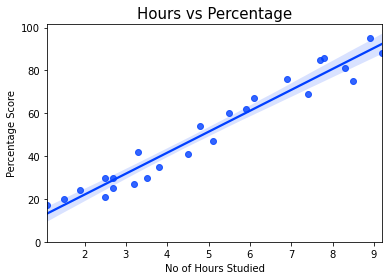

In [6]:
sns.regplot(x="Hours", y="Scores", data=df)
plt.ylim(0,)
plt.title('Hours vs Percentage',fontsize=15)  
plt.xlabel('No of Hours Studied')  
plt.ylabel('Percentage Score')  

#### Plotting Residual plot to Check our Linear Assumption

Text(0.5, 1.0, 'Residual Plot')

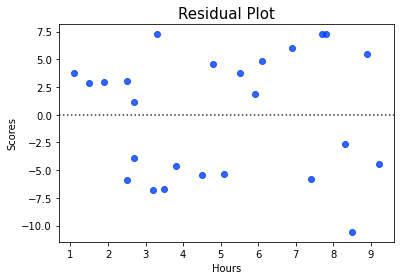

In [7]:
sns.residplot(x="Hours", y="Scores", data=df)
plt.title('Residual Plot',fontsize=15) 

#### Since Residual Plot is randomly spreadout around x-axis therefore our Linear assumption is CORRECT

### Defining Variables and Spliting Data

In [8]:
X=df[["Hours"]]
y=df["Scores"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

###  Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm=LinearRegression()

In [12]:
lm.fit(X_train,y_train)

LinearRegression()

### Prediction

In [13]:
Yhat=lm.predict(X_test)

In [14]:
Yhat

array([28.14877107, 39.00765694, 34.07179972, 59.73825724, 16.30271375,
       74.54582888, 69.60997167, 48.87937137])

In [15]:
Prediction=pd.DataFrame({"Actual":y_test,"Predicted":Yhat})
Prediction.head()

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714


### Plotting Distribution Plot 
#### Checking how similar our predicted and test scores are

C:\Users\Kanse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Kanse\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


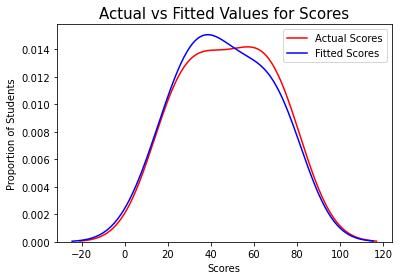

In [16]:
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Scores")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Scores",ax=ax1)
plt.title('Actual vs Fitted Values for Scores',fontsize=15)
plt.xlabel('Scores')
plt.ylabel('Proportion of Students')
plt.legend()

In [17]:
def score(hours):
    #gives the score of the student on basis of no of hours studied
    x=hours
    print("If a student studies for {} then their score can be {}." .format(x,lm.predict([[x]])[0]))

In [18]:
score(9.25)

If a student studies for 9.25 then their score can be 92.80850057353504.


#### Therefore,According to the trained algorithm 
### If a student studies for 9.25hrs then their predicted score is 92.80.

## Model Evaluation

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
print("Value of MSE is",mean_squared_error(y_test,Yhat))

Value of MSE is 25.678419573283865


In [21]:
print("Value of R^2 is",lm.score(X_test,y_test) )

Value of R^2 is 0.9309458862687437


#### Since our R^2 value is 0.931 which is close to 1 we can say that it is a Good Fit